# Tâche 7: pics d'un diffractogramme 

In [186]:
#telechargement du fichier CIF du matériau attribué
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.surface import get_symmetrically_equivalent_miller_indices

In [187]:
with MPRester("G0BptrHMmTXo23sw") as m:

    # Pour obtenir des informations sur un matériau (structure) avec Materials Project Id
    structure = m.get_structure_by_material_id("mp-554310")


Dans cette partie du projet, nous allons analyser les 3 premiers pics du difractogramme correspondant (en
indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα
de longueur d’onde λ=1.54060 Å. Pour ce faire, nous allons utliser le site de [Materials Project](https://materialsproject.org/materials/mp-554310/#) ainsi que le chapitre 3 sur la [radiocristallographie](https://moodleucl.uclouvain.be/pluginfile.php/1274328/mod_resource/content/1/Chap-3.pdf) du cours de physique des matériaux.

Lorsque nous envoyons des rayons X (dans notre cas un rayonnement X incident Cu Kα) sur un réseau d'atome (le cristal), il se produit un phénomène d'interférences constructives et destructives en fonction de la direction. Pour représenter le phénomène, voici une image tirée du cours:

![title](https://raw.githubusercontent.com/Vahouben/lmapr1492/master/scheme.png)

## 1) Diagramme de diffraction

Nous allons chercher, la position des pics de diffractions (caractérisés par l'angle 2$\theta$). Pour rappel, selon la loi de Bragg: $$n \lambda= 2 sin \theta$$ Où d est la distance inter-planaire, l'entier n est l’ordre de la réflexion et 2$\theta$ l'angle entre le rayon incident et le rayon réfléchi.

In [188]:
#création de la figure de diffraction 
CuKa= XRDCalculator('CuKa1')
pattern=CuKa.get_pattern(structure)

Nous vérifions que nous avons bien la bonne longueur d'onde de rayonnement et donc la bonne énergie:

In [189]:
CuKa.wavelength

1.54056

Nous affichons ici le graphique de la diffraction, l'axe des abcisses va de 0 à 30° afin de montrer uniquement les pics qui nous intéressent. On peut comparer le diagramme avec celui disponible sur [Materials Project](https://materialsproject.org/materials/mp-554310/#). 

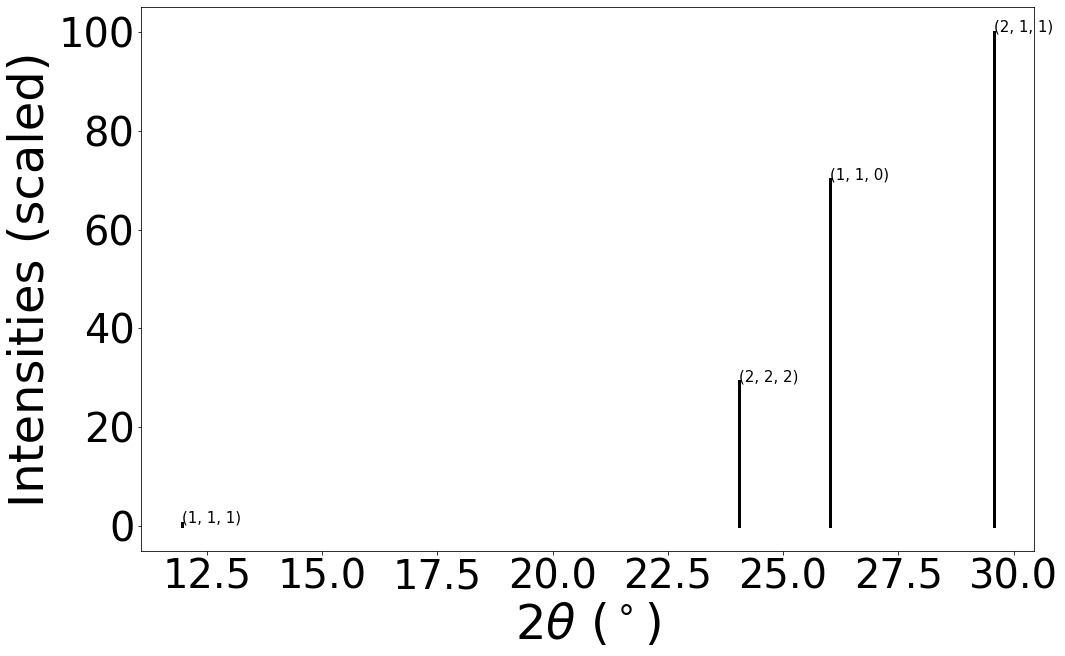

In [190]:
CuKa.show_plot(structure,fontsize=15,two_theta_range=(0,30))

![title](https://raw.githubusercontent.com/Vahouben/lmapr1492/master/chart.png)

Pour comparer ces deux graphiques, il est important de garder en tête que le matérials project se base sur la maille conventionelle et que les calculs effectués ici se font dans la maille primitive.

In [191]:
#creation des différents vecteurs avec les informations qui nous intéressent dans l'étude des pics
hkls=pattern.hkls
d=pattern.d_hkls
twotheta=pattern.x
intensity=pattern.y

L'échelle est telle que le pic d'intensité maximale aura la valeur de 100. On voit que cette intensité maximale ($I_{max})$ se trouve pour un angle de 

In [165]:
twotheta[3]

29.568841533607795

Qui ne fait pas partie des 3 premiers pics et que nous n'analyserons donc pas dans la prochaine section mais sur lequel se base toutes les intensités que nous allons obtenir prochainement selon la formule: $$\frac{I_{pic}}{I_{max}}$$

## 2)Analyse des 3 premiers pics

### Premier pic:

In [192]:
print("Le premier pic est obtenu avec un angle d'incidence de " + str(twotheta[0]) + "°")

Le premier pic est obtenu avec un angle d'incidence de 11.959831901983575°


In [193]:
print("Son intensité relative est de "+ str(intensity[0])+ "[-]")

Son intensité relative est de 0.6378089029213492[-]


L'intensité de ce pic est donc extrèmement faible, moins d'un centième de l'intensité du pic le plus important, c'est d'ailleur pourquoi il n'est même pas visible sur l'image du matérials project (il est néanmoins visible si on zoom énormement, il existe donc bien).

In [194]:
print("La distance inter-planaire est de "+ str(hkl[0])+ " Å")

La distance inter-planaire est de 7.393752649415936 Å


In [195]:
print("Et l'indice hkl et la multiplicité associés sont "+ str(hkls[0]))

Et l'indice hkl et la multiplicité associés sont [{'hkl': (1, 1, 1), 'multiplicity': 2}]


La multiplicité 2 nous indique qu'il existe deux plans d'indices de Miller, équivalents par symétrie. 

In [196]:
get_symmetrically_equivalent_miller_indices(structure,[1, 1, 1],False)

[[1, 1, 1], (1, 1, 1), (-1, -1, -1)]

Les indices hkl de la famille de plans {1,1,1} sont donc $$(1,1,1)$$ mais aussi $$(\bar{1},\bar{1},\bar{1})$$ Il ne faut néanmoins pas oublier que en raison de la périodicité du réseau, (hkl) désigne une infinité de plans parallèles entre eux, dont un passe toujours par l'origine.

### Deuxième pic: 

In [197]:
print("le deuxieme pic est obtenu avec un angle d'incidence de " + str(twotheta[1]) + "°")
print("Son intensité relative est de "+ str(intensity[1])+ "[-]")
print("La distance interplanaire est de "+ str(hkl[1])+ "Å")
print("Et l'indice hkl et la multiplicité associés sont "+ str(hkls[1]))

le deuxieme pic est obtenu avec un angle d'incidence de 24.052486221002948°
Son intensité relative est de 29.285986075930975[-]
La distance interplanaire est de 3.696876324707968Å
Et l'indice hkl et la multiplicité associés sont [{'hkl': (2, 2, 2), 'multiplicity': 2}]


La multiplicité 2 nous indique donc que les indices de Miller hkl sont $$(2,2,2)$$ mais aussi $$(\bar{2},\bar{2},\bar{2})$$

### Troisième pic:

In [198]:
print("Le troisième pic est obtenu avec un angle d'incidence de " + str(twotheta[2]) + "°")
print("Son intensité relative est de "+ str(intensity[2])+ "[-]")
print("La distance interplanaire est de "+ str(hkl[2]) + "Å")
print("Et l'indice hkl et la multiplicité associés sont "+ str(hkls[2]))

Le troisième pic est obtenu avec un angle d'incidence de 26.0115152459043°
Son intensité relative est de 70.22455707703867[-]
La distance interplanaire est de 3.42272177369227Å
Et l'indice hkl et la multiplicité associés sont [{'hkl': (1, 1, 0), 'multiplicity': 6}]


In [199]:
get_symmetrically_equivalent_miller_indices(structure,[1, 1, 0],False)

[[1, 1, 0],
 (1, 1, 0),
 (1, 0, 1),
 (0, 1, 1),
 (0, -1, -1),
 (-1, 0, -1),
 (-1, -1, 0)]

La multiplicité 6 nous indique donc que les indices hkl sont $$(1,1,0)$$ $$(1,0,1)$$ $$(0,1,1)$$ $$(0,\bar{1},\bar{1})$$ $$(\bar{1},0,\bar{1})$$ $$(\bar{1},\bar{1},0)$$

## 3) Remarque/ note

Il est également possible d'effectuer les calculs que nous avons vu en utilisant la maille conventionelle.

In [200]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
Analyse=SpacegroupAnalyzer(structure)
stru=Analyse.get_conventional_standard_structure()

In [201]:
pat2=pattern=CuKa.get_pattern(stru)
hkls2=pat2.hkls
twotheta2=pat2.x

Ainsi nous obtenons exactement les mêmes indices hkli que dans le [Materials Project](https://materialsproject.org/materials/mp-554310/#):

In [202]:
hkls2[1]

[{'hkl': (0, 0, 0, 6), 'multiplicity': 2}]

Néamoins il persiste une petite différence d'angle et d'intensité qui pourrait être expliquée par une différence de degré de précision entre pymatgen et matérials project.